# Transfer Learning using Keras - VGG-16

Convolutional neural networks are now capable of outperforming humans on some computer vision tasks, such as classifying images.


## ImageNet

* ImageNet is a research project to develop a large database of images with annotations, e.g. images and their descriptions.
* The ImageNet Large Scale Visual Recognition Challenge is a benchmark in object category classification and detection on hundreds of object categories and millions of images.

* For the classification task, images must be classified into one of 1,000 different categories.

For the last few years very deep convolutional neural network models have been used to win these challenges and results on the tasks have exceeded human performance.

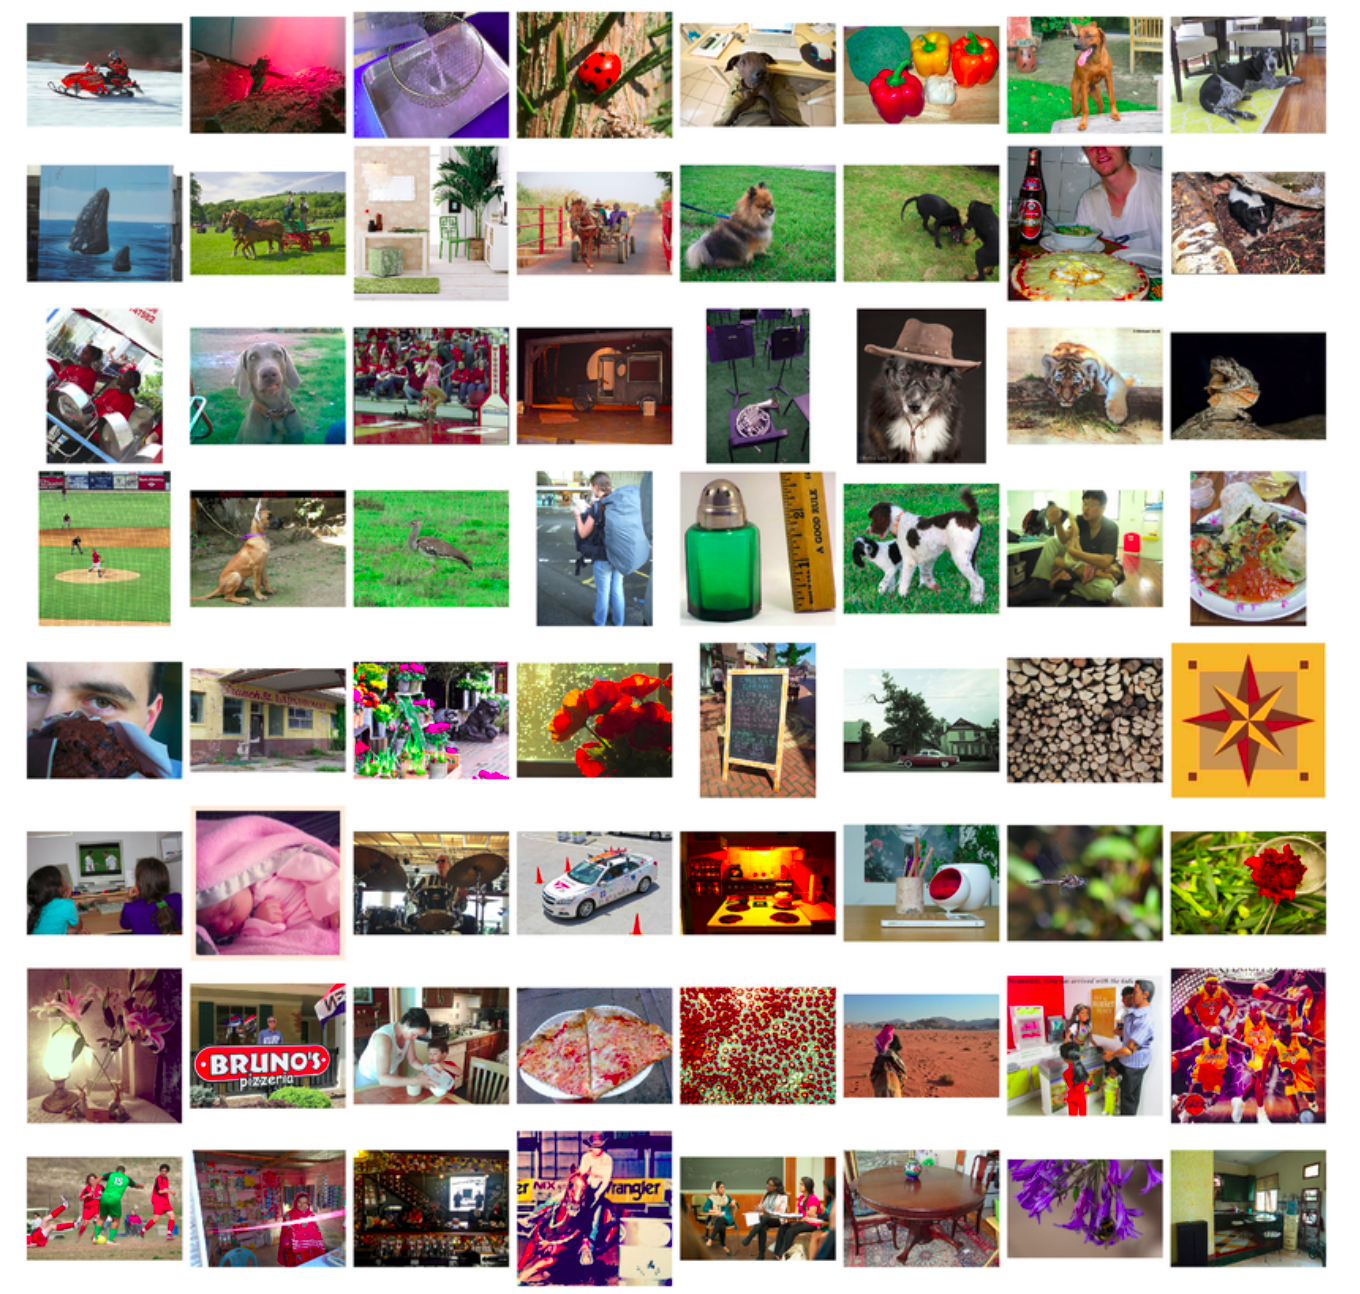
Sample of Images from the ImageNet Dataset

## Load the VGG Model in Keras

The VGG model can be loaded and used in the Keras deep learning library.

Keras provides an Applications interface for loading and using pre-trained models.

Using this interface, you can create a VGG model using the pre-trained weights provided by the Oxford group and use it as a starting point in your own model, or use it as a model directly for classifying images.

Keras provides both the 16-layer and 19-layer version via the VGG16 and VGG19 classes. Let’s focus on the VGG16 model.

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

Using TensorFlow backend.


Note -: The weights are only downloaded once. The next time you run the example, the weights are loaded locally and the model should be ready to use in seconds.

In [2]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

The VGG() class takes a few arguments that may only interest you if you are looking to use the model in your own project, e.g. for transfer learning.

For example:

* **include_top (True)**: Whether or not to include the output layers for the model. You don’t need these if you are fitting the model on your own problem.

* **weights (‘imagenet')**: What weights to load. You can specify None to not load pre-trained weights if you are interested in training the model yourself from scratch.

* **input_tensor (None)**: A new input layer if you intend to fit the model on new data of a different size.
* **input_shape (None)**: The size of images that the model is expected to take if you change the input layer.
* **pooling (None)**: The type of pooling to use when you are training a new set of output layers.
* **classes (1000)**: The number of classes (e.g. size of output vector) for the model.


## Load and Prepare Image

Next, we can load the image as pixel data and prepare it to be presented to the network.-

Keras provides some tools to help with this step.

First, we can use the *load_img()* function to load the image and resize it to the required size of 224×224 pixels.

In [9]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))

Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.

In [10]:
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

The network expects one or more images as input; that means the input array will need to be 4-dimensional: *samples, rows, columns, and channels*.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.

In [11]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))


In [12]:
print(image.shape)

(1, 224, 224, 3)


Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Keras provides a function called *preprocess_input()* to prepare new input for the network.

In [14]:
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

(1, 224, 224, 3)


We are now ready to make a prediction for our loaded and prepared image.

## Make a Prediction

We can call the *predict()* function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.

In [19]:
# predict the probability across all output classes
yhat = model.predict(image)

## Interpret Prediction -

Keras provides a function to interpret the probabilities called *decode_predictions()*.

It can return a list of classes and their probabilities in case you would like to present the top 3 objects that may be in the photo. We will just report the first most likely object.

In [32]:
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)    # There is a list inside the main list. The inner list contains tuples
print(label)
print('\n')
for i in label:
    for j in i:
        print(j)

[[('n03063599', 'coffee_mug', 0.9035116), ('n07930864', 'cup', 0.058158528), ('n03063689', 'coffeepot', 0.012107778), ('n03950228', 'pitcher', 0.011135311), ('n04560804', 'water_jug', 0.009127358)]]


('n03063599', 'coffee_mug', 0.9035116)
('n07930864', 'cup', 0.058158528)
('n03063689', 'coffeepot', 0.012107778)
('n03950228', 'pitcher', 0.011135311)
('n04560804', 'water_jug', 0.009127358)


In [33]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (90.35%)
